# Regresión Lineal Simple 

El objetivo ahora consiste en tratar de predecir una variable continua a partir de otra mediante una recta. Los supuestos del modelo son los siguientes
- Linealidad: Que la relación entre las variables sea lineal.
- Independencia: Que los errores en la medición de las variables explicativas sean
 independientes entre sí.
- Homocedasticidad: Que los errores tengan varianza constante.
- Normalidad: Que las variables sigan la Ley Normal.
- No colinealidad: Que las variables independientes no estén correlacionadas entre ellas (caso multivariante)

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('price.csv',sep=';')
df #leemos la base de datos de precio de viviendas en función
#del área que esta abarca

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


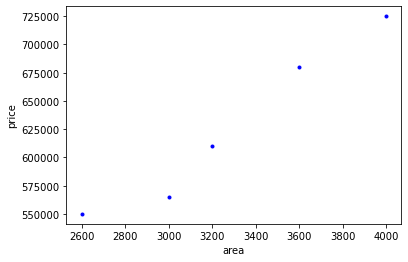

In [3]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='blue',marker='.')

Vemos como parece que los precios podrían ser explicados correctamente por el area de la vivienda. Veamos su correlación

In [4]:
df.corr() #correlación de 0.97 muy alta

,area,price
area,1.000000,0.978994
price,0.978994,1.000000


In [5]:
var_ind= df.drop('price',axis='columns')
var_dep=df.price

In [6]:
reg = linear_model.LinearRegression()
reg.fit(var_ind,var_dep)

LinearRegression()

In [7]:
reg.coef_,reg.intercept_ #los coeficientes de la recta
#de regresión y=Ax+B

(array([135.78767123]), 180616.43835616432)

Podemos crear una predicción dado un nuevo área

In [8]:
def prediccion(area):
    return(135.78767123*area+180616.43835616432)

In [9]:
prediccion(3500)

655873.2876611643

In [10]:
reg.predict([[3500]]) #método con el modelo ya implementado

array([655873.28767123])

Vamos a estimar una nueva base de datos con áreas

In [11]:
data={'Area_a_estimar':[3200,3300,3400,3500,3600,3700,3800]}
df_a_estimar = pd.DataFrame(data)

In [12]:
df_a_estimar

,Area_a_estimar
0,3200
1,3300
2,3400
3,3500
4,3600
5,3700
6,3800


In [13]:
price_estimated= reg.predict(df_a_estimar)

In [14]:
df_estimaciones = df_a_estimar
df_estimaciones['price_est']=price_estimated

In [15]:
df_estimaciones

,Area_a_estimar,price_est
0,3200,615136.986301
1,3300,628715.753425
2,3400,642294.520548
3,3500,655873.287671
4,3600,669452.054795
5,3700,683030.821918
6,3800,696609.589041


In [16]:
x1=np.arange(2600,4000)
y1=prediccion(x1)

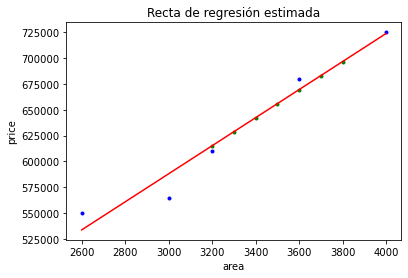

In [17]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='blue',marker='.')
plt.plot(x1,y1,color='red')
plt.title('Recta de regresión estimada')
plt.scatter(df_estimaciones['Area_a_estimar'],df_estimaciones['price_est'],marker='.',color='green')

Vemos como cualquier estimacion de un nuevo área estará encima de la recta de regresión, como era de esperar.

In [18]:
reg.score(var_ind,var_dep) #R cuadrado o ajuste del modelo

0.9584301138199486

In [19]:
residuos = var_dep - reg.predict(var_ind)
residuos

0    16335.616438
1   -22979.452055
2    -5136.986301
3    10547.945205
4     1232.876712
Name: price, dtype: float64

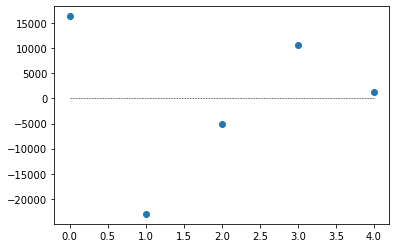

In [20]:
plt.scatter(np.arange(0,5),residuos)
plt.plot(np.arange(0,5),np.repeat(0,5),color='black',linewidth=0.5,linestyle='--')

Vemos como los residuos cumplen las propiedades de homocedasticidad e independencial. Igualmente, por experiencia sabemos que los precios de casas son variables normales, al igual que los tamaños de las mismas, con lo que el modelo se toma por válido.